Typical DS packages

In [172]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from sklearn import datasets

from tqdm import tqdm

In [173]:
pip install -r requirements.txt

  Cloning https://github.com/EgorDudyrev/caspailleur.git to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-62xp5227/caspailleur_9dffcfc070e24f839b5c274c36b1a19e
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/caspailleur.git /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-62xp5227/caspailleur_9dffcfc070e24f839b5c274c36b1a19e
  Resolved https://github.com/EgorDudyrev/caspailleur.git to commit b65df09edaef0767c8d5a5aa97a9efe809c7d24a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/EgorDudyrev/paspailleur.git (to revision feature/pattern_keys) to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-62xp5227/paspailleur_37a30a92cb3b40419e2694e0b47ea616
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/paspailleur.git /private/var/folders/ym/ymvb

FCA packages

In [174]:
import caspailleur as csp
from paspailleur import pattern_structures as PS

Bitarrays that make operations on extent really fast

# Clustering Step 1. Get the data

In [175]:
from bitarray.util import subset as ba_subset
from bitarray import frozenbitarray

Copy-pasting the code from https://scikit-learn.org/stable/modules/clustering.html

## noisy circles

In [176]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
X, y = noisy_circles

## noisy moons

In [192]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

X, y = noisy_moons

## blobs

In [208]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

X, y = blobs

## varied

In [228]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

X, y = varied

## no_structure

In [243]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

X, y = no_structure

## aniso

In [258]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170




X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


X, y = aniso

In [259]:
import visual_lib as vlib

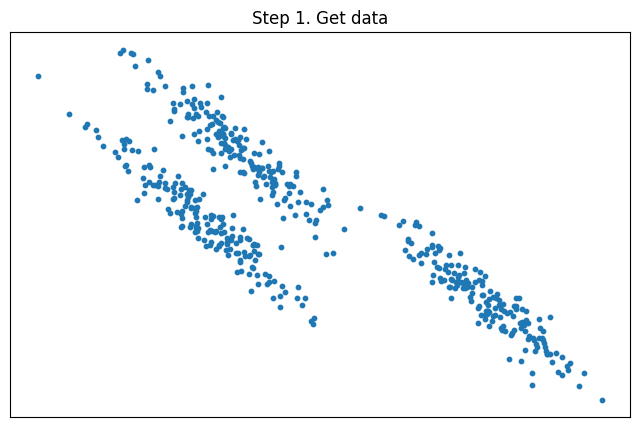

In [260]:
fig, ax = plt.subplots(figsize=(8, 5))

vlib.init_axis(ax, 'Step 1. Get data', [], [])
ax.scatter(X[:,0], X[:,1], s=10)

fig.savefig('pipe_step1_circlesdata.pdf')
plt.show()

In [261]:
MIN_SUPPORT = 0.1
MIN_STABILITY = 0.01
PRECISION = 6

In [262]:
borders_per_axis = [np.linspace(X[:,j].min(), X[:,j].max(), 11) for j in range(X.shape[1])]
borders_per_axis

[array([-5.70080235, -4.85868142, -4.0165605 , -3.17443957, -2.33231865,
        -1.49019772, -0.6480768 ,  0.19404412,  1.03616505,  1.87828597,
         2.7204069 ]),
 array([-3.15018913, -2.32532734, -1.50046555, -0.67560375,  0.14925804,
         0.97411983,  1.79898162,  2.62384341,  3.4487052 ,  4.27356699,
         5.09842878])]

In [263]:
basic_pss = [PS.IntervalPS(values=borders, ndigits=PRECISION) for borders in borders_per_axis]
ps_cart = PS.CartesianPS(basic_pss)
#data = list(ps_cart.preprocess_data(X))

In [264]:
import clustering

In [265]:
from clustering import run_clustering

In [266]:
import time

In [267]:
t0 = time.time()
clusters_df = run_clustering(X, ps_cart, clustering_params=None)
t1 = time.time()

Compute intents: 100%|██████████████████████| 386/386 [00:00<00:00, 1985.59it/s]


In [268]:
clusters_df 

,extent,intent,delta_stability,support,frequency,intent_human
21,"[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...","((-4.01656, 1.878286, (BoundStatus.RCLOSED, Bo...",36,393,0.786,"x0: [-4.02, 1.88], x1: [-1.50, 3.45]"
176,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...","((-4.858681, -2.332319, (BoundStatus.RCLOSED, ...",9,197,0.394,"x0: [-4.86, -2.33], x1: [0.97, 5.10]"
342,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","((1.036165, 2.720407, (BoundStatus.RCLOSED, Bo...",9,74,0.148,"x0: [1.04, 2.72], x1: [-∞, -0.68]"


## GRAPHS

## For 3 concepts

In [269]:
extents = {
'0': clusters_df['extent'][21],
'1': clusters_df['extent'][176],
'2': clusters_df['extent'][342],
    
}

In [270]:
object_clusters = {
'0': clusters_df['extent'][21].search(True),
'1': clusters_df['extent'][176].search(True),
'2': clusters_df['extent'][342].search(True)
}

In [271]:
obj_belongs = np.array([0]*500)
for i in range(0, 500): 
    if(i in object_clusters['0']) and (i not in object_clusters['1']) and (i not in object_clusters['2']):
        obj_belongs[i] = 0
        
    elif (i in object_clusters['1']) and (i not in object_clusters['0']) and (i not in object_clusters['2']):
        obj_belongs[i] = 1        
    elif (i in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
        obj_belongs[i] = 2
        
    else:
        obj_belongs[i] = -1

## For 2 concepts

In [239]:
extents = {
'0': clusters_df['extent'][13],
'1': clusters_df['extent'][449],
    
}

In [240]:
object_clusters = {
'0': clusters_df['extent'][13].search(True),
'1': clusters_df['extent'][449].search(True),
}

In [241]:
obj_belongs = np.array([0]*500)
for i in range(0, 500): 
    if(i in object_clusters['0']) and (i not in object_clusters['1']):
        obj_belongs[i] = 0
        
    elif (i in object_clusters['1']) and (i not in object_clusters['0']):
        obj_belongs[i] = 1        

    else:
        obj_belongs[i] = -1

## sim_circles

In [191]:
pairs_fca_circles = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_circles.add((i,j))

## sim_moons

In [207]:
pairs_fca_moons = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_moons.add((i,j))

## sim_blobs

In [227]:
pairs_fca_blobs = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_blobs.add((i,j))

## sim_var

In [242]:
pairs_fca_var = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_var.add((i,j))

## sim_no_str

In [257]:
pairs_fca_no_str = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_no_str.add((i,j))

## sim_aniso

In [272]:
pairs_fca_aniso = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_aniso.add((i,j))

## Draw

In [136]:
import warnings
from itertools import cycle, islice

## Noisy Circles

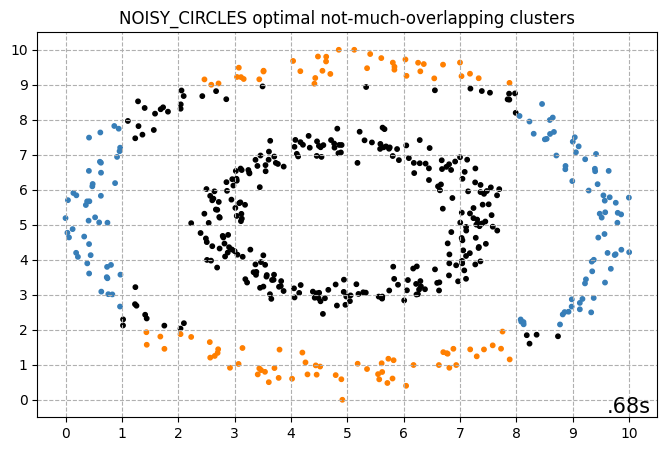

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"NOISY_CIRCLES optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('noisy_circles.pdf')
plt.show()

### percent pairs

## Noisy Moons

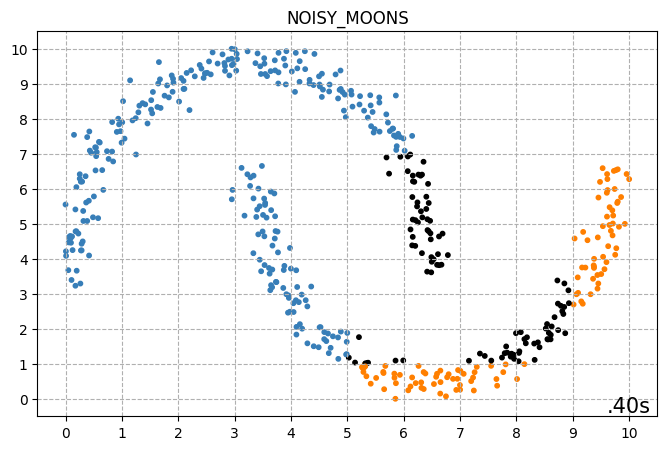

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"NOISY_MOONS", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('noisy_moons.pdf')
plt.show()

### percent

## blobs

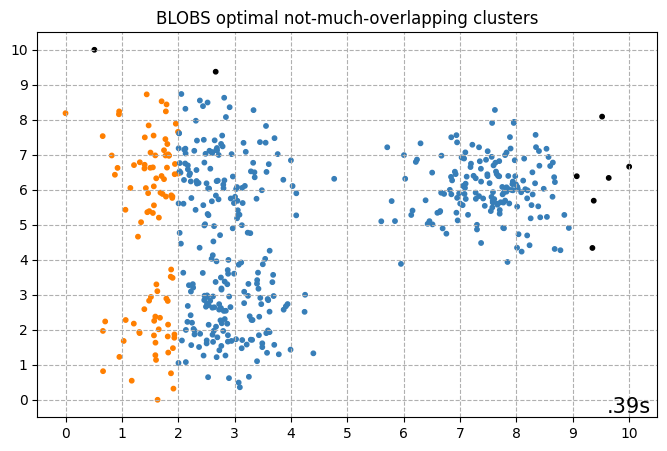

In [88]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"BLOBS optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('blobs.pdf')
plt.show()

### percent

## varied

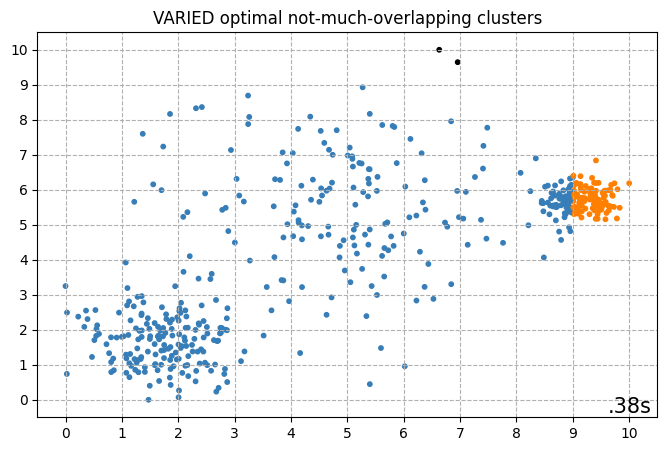

In [104]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"VARIED optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('varied.pdf')
plt.show()

### percent

## no_structure

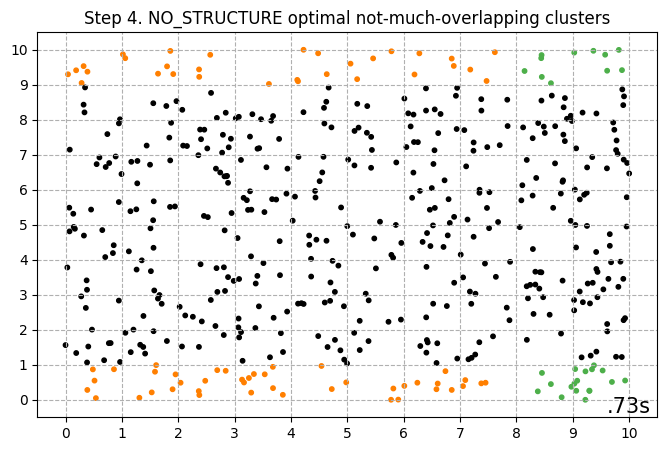

In [121]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"Step 4. NO_STRUCTURE optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('no_structure.pdf')
plt.show()

### percent

## aniso

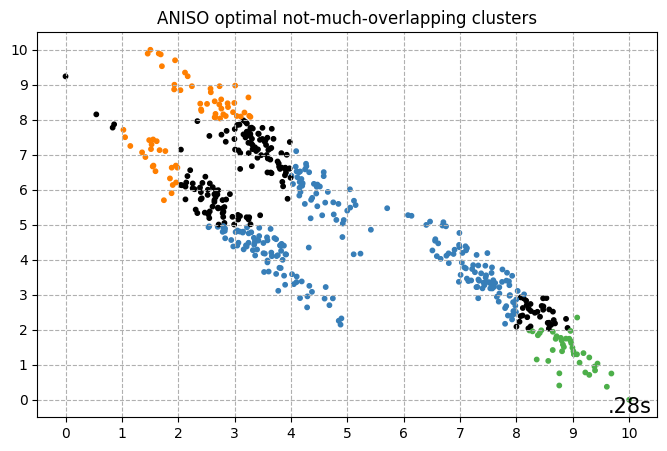

In [137]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"ANISO optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('aniso.pdf')
plt.show()

### percent

## End of smart_version

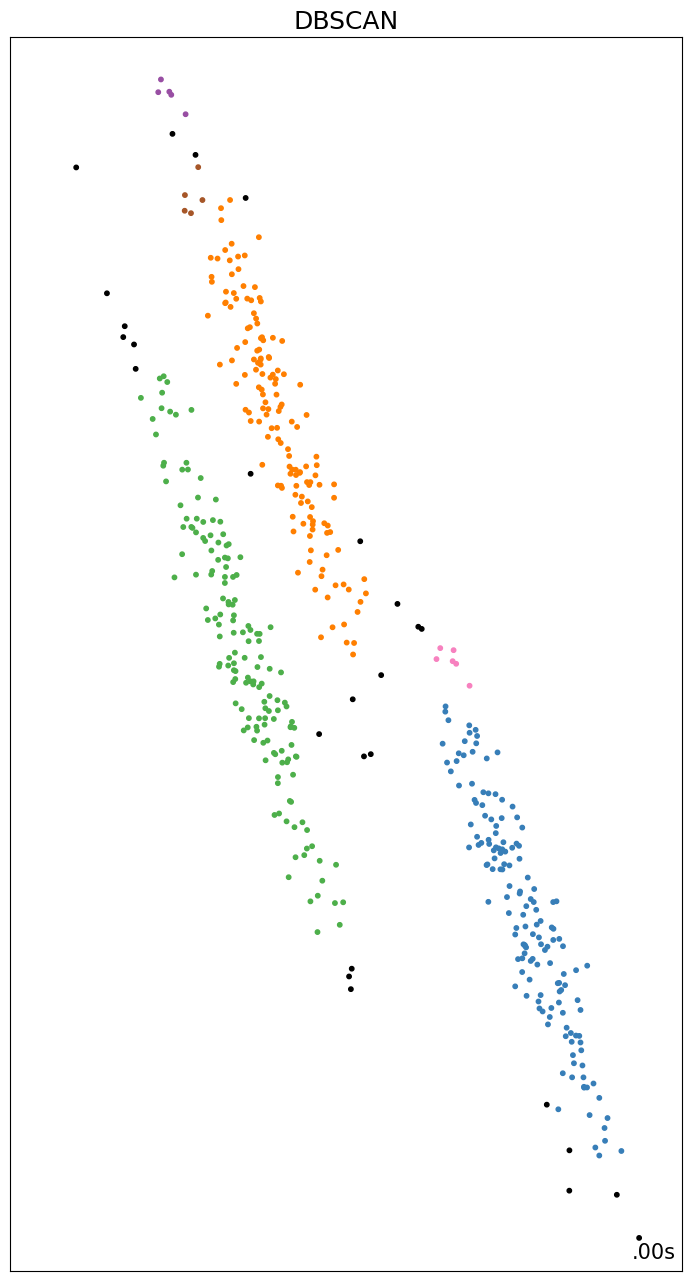

In [169]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(2 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    # (
    #     noisy_circles,
    #     {
    #         "damping": 0.77,
    #         "preference": -240,
    #         "quantile": 0.2,
    #         "n_clusters": 2,
    #         "min_samples": 7,
    #         "xi": 0.08,
    #     },
    # ),
    # (
    #     noisy_moons,
    #     {
    #         "damping": 0.75,
    #         "preference": -220,
    #         "n_clusters": 2,
    #         "min_samples": 7,
    #         "xi": 0.1,
    #     },
    # ),
    # (
    #     varied,
    #     {
    #         "eps": 0.18,
    #         "n_neighbors": 2,
    #         "min_samples": 7,
    #         "xi": 0.01,
    #         "min_cluster_size": 0.2,
    #     },
    # ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    # (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    # (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============

    
    #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    k_means = cluster.KMeans( #<================================= we need this
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )


    
    # ward = cluster.AgglomerativeClustering(
    #     n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    # )


    
    # spectral = cluster.SpectralClustering(
    #     n_clusters=params["n_clusters"],
    #     eigen_solver="arpack",
    #     affinity="nearest_neighbors",
    #     random_state=params["random_state"],
    # )  

    
    dbscan = cluster.DBSCAN(eps=params["eps"]) #<================================= we need this
    # hdbscan = cluster.HDBSCAN(
    #     min_samples=params["hdbscan_min_samples"],
    #     min_cluster_size=params["hdbscan_min_cluster_size"],
    #     allow_single_cluster=params["allow_single_cluster"],
    # )
    # optics = cluster.OPTICS(
    #     min_samples=params["min_samples"],
    #     xi=params["xi"],
    #     min_cluster_size=params["min_cluster_size"],
    # )
    # affinity_propagation = cluster.AffinityPropagation(
    #     damping=params["damping"],
    #     preference=params["preference"],
    #     random_state=params["random_state"],
    # )
    # average_linkage = cluster.AgglomerativeClustering(
    #     linkage="average",
    #     metric="cityblock",
    #     n_clusters=params["n_clusters"],
    #     connectivity=connectivity,
    # )
    # birch = cluster.Birch(n_clusters=params["n_clusters"])
    # gmm = mixture.GaussianMixture(
    #     n_components=params["n_clusters"],
    #     covariance_type="full",
    #     random_state=params["random_state"],
    # )

    clustering_algorithms = (
        # ("KMeans", k_means), # <================================================== we work with it
        #("Affinity\nPropagation", affinity_propagation),
       # ("MeanShift", ms),
       # ("Spectral\nClustering", spectral),
       # ("Ward", ward),
       # ("Agglomerative\nClustering", average_linkage),
       ("DBSCAN", dbscan), # <=============================================== we work with it
      #  ("HDBSCAN", hdbscan),
       # ("OPTICS", optics),
        #("BIRCH", birch),
       # ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

## for comparison 

## K_means

### noisy_circles

In [147]:
pairs_k_means_circles = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_circles.add((i,j))

### noisy_moons

In [150]:
pairs_k_means_noisy_moons = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_noisy_moons.add((i,j))

### blobs

In [152]:
pairs_k_means_blobs = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_blobs.add((i,j))

### varied

In [154]:
pairs_k_means_varied = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_varied.add((i,j))

### no_structure

In [156]:
pairs_k_means_no_structure = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_no_structure.add((i,j))

### aniso

In [158]:
pairs_k_means_aniso = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_k_means_aniso.add((i,j))

## DBSCAN

### noisy_circles

In [160]:
pairs_db_circles = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_circles.add((i,j))

### noisy_moons

In [162]:
pairs_db_noisy_moons = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_noisy_moons.add((i,j))

### blobs

In [164]:
pairs_db_blobs = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_blobs.add((i,j))

### varied

In [166]:
pairs_db_varied = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_varied.add((i,j))

### no_structure

In [168]:
pairs_db_no_structure = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_no_structure.add((i,j))

### aniso

In [170]:
pairs_db_aniso = set()
for i in range(0, len(y_pred)):
    for j in range(i+1,len(y_pred)):
        if y_pred[i] == y_pred[j]:
            pairs_db_aniso.add((i,j))

# Similarity 

In [274]:
#pairs_fca_circles

In [277]:
#pairs_k_means_circles

In [279]:
#pairs_db_circles

In [281]:
#pairs_fca_moons

In [285]:
#pairs_k_means_noisy_moons

In [288]:
#pairs_db_noisy_moons

In [290]:
#pairs_fca_blobs

In [293]:
#pairs_k_means_blobs

In [295]:
#pairs_db_blobs

In [298]:
#pairs_fca_var

In [300]:
#pairs_k_means_varied

In [302]:
#pairs_db_varied

In [305]:
#pairs_fca_no_str

In [307]:
#pairs_k_means_no_structure

In [309]:
#pairs_db_no_structure

In [311]:
#pairs_fca_aniso

In [313]:
#pairs_k_means_aniso

In [315]:
#pairs_db_aniso

## noisy_circles

### k-means

In [336]:
k_means_circle = len(pairs_fca_circles & pairs_k_means_circles)/(500*500)*2
k_means_circle

0.214016

### dbscan

In [337]:
k_db_circle = len(pairs_fca_circles & pairs_db_circles)/(500*500)*2
k_db_circle 

0.341432

## noisy_moons

### k-means

In [338]:
k_means_moons = len(pairs_fca_moons & pairs_k_means_noisy_moons )/(500*500)*2
k_means_moons

0.318048

### dbscan

In [339]:
db_moons = len(pairs_fca_moons & pairs_db_noisy_moons )/(500*500)*2
db_moons 

0.261008

## blobs

### k-means

In [340]:
k_means_blobs = len(pairs_fca_blobs & pairs_k_means_blobs )/(500*500)*2
k_means_blobs 

0.233272

### dbscan

In [341]:
db_blobs = len(pairs_fca_blobs & pairs_db_blobs)/(500*500)*2
db_blobs

0.357104

## varied

### k-means

In [342]:
k_means_var = len(pairs_fca_var & pairs_k_means_varied)/(500*500)*2
k_means_var 

0.27404

### dbscan

In [343]:
db_var = len(pairs_fca_var & pairs_db_varied)/(500*500)*2
db_var

0.211104

## no_structure

### k-means

In [344]:
k_means_no_str = len(pairs_fca_no_str &pairs_k_means_no_structure)/(500*500)*2
k_means_no_str

0.22096

### dbscan

In [345]:
db_no_str = len(pairs_fca_no_str & pairs_db_no_structure)/(500*500)*2
db_no_str 

0.656296

## aniso

### k-means

In [346]:
k_means_aniso = len(pairs_fca_aniso & pairs_k_means_aniso)/(500*500)*2
k_means_aniso

0.163312

### dbscan

In [347]:
db_aniso = len(pairs_fca_aniso & pairs_db_aniso)/(500*500)*2
db_aniso

0.110144

In [348]:
df = pd.DataFrame(columns = ['dataset','K_means', 'DBSCAN'])
df

,dataset,K_means,DBSCAN


In [349]:
circles = {'dataset': 'noisy_circles', 'K_means': k_means_circle, 'DBSCAN': k_db_circle}
moons = {'dataset': 'noisy_moons', 'K_means':k_means_moons, 'DBSCAN':db_moons }
blobs = {'dataset': 'blobs', 'K_means':k_means_blobs , 'DBSCAN':db_blobs}
varied = {'dataset': 'varied', 'K_means' :k_means_var , 'DBSCAN':db_var}
no_structure = {'dataset': 'no_structure', 'K_means': k_means_no_str, 'DBSCAN':db_no_str }
aniso = {'dataset': 'aniso', 'K_means':k_means_aniso, 'DBSCAN':db_aniso}


In [350]:
df = df._append(circles, ignore_index = True)
df = df._append(moons, ignore_index = True)
df = df._append(blobs, ignore_index = True)
df = df._append(varied, ignore_index = True)
df = df._append(no_structure, ignore_index = True)
df = df._append(aniso, ignore_index = True)

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_5484/3553944422.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(circles, ignore_index = True)


In [351]:
df

,dataset,K_means,DBSCAN
0,noisy_circles,0.214016,0.341432
1,noisy_moons,0.318048,0.261008
2,blobs,0.233272,0.357104
3,varied,0.274040,0.211104
4,no_structure,0.220960,0.656296
5,aniso,0.163312,0.110144


In [352]:
df.to_csv('similarity.csv', index = False)

Добрый день. 
У меня для каждого кластера указан extent, оформленный в формате bitarray (или возможно frozenbitarray что почти то же самое). Bitarray - это список битов, где i-тый бит соответствует i-тому объекту. То есть например если мы определим extent = clusters_df['extent'][k] то extent[i] == True будет означать что i-тый объект находится в кластере k-том кластере. Список всех индексов объектов находящихся в кластере можно получить через extent.search(True).
Так что можно создать numpy.array в котором указать номер кластера для каждого объекта в зависимости от того, в каком из экстентов кластеров этот объект находится. Если объект можно найти в нескольких экстентах (т.е. в пересечении кластеров), можно пометить его как None или -1 (не помню что используется в sklearn в качестве некластеризованного объекта). И потом можно вставить этот numpy.array в код рисования графиков, который можно найти на sklearn